In [32]:
from pandas import read_excel
from pandas import DataFrame
from pandas import merge
from statsmodels.formula.api import logit
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pandas import Series
from pandas import read_excel
import pandas as pd

## 1

In [33]:
df = read_excel('http://itpaper.co.kr/data/flight_delays.xlsx', engine = 'openpyxl')
df

,FL_NUM,TAIL_NUM,FL_DATE,DAY_WEEK,CRS_DEP_TIME,DEP_TIME,ORIGIN,DEST,CARRIER,DISTANCE,WEATHER,FLIGHT_STATUS
0,5935,N940CA,2004/01/01,4,1455,1455,BWI,JFK,OH,184,0,ontime
1,6155,N405FJ,2004/01/01,4,1640,1640,DCA,JFK,DH,213,0,ontime
2,7208,N695BR,2004/01/01,4,1245,1245,IAD,LGA,DH,229,0,ontime
3,7215,N662BR,2004/01/01,4,1715,1709,IAD,LGA,DH,229,0,ontime
4,7792,N698BR,2004/01/01,4,1039,1035,IAD,LGA,DH,229,0,ontime
...,...,...,...,...,...,...,...,...,...,...,...,...
2196,2761,N15555,2004/1/31,6,645,644,DCA,EWR,RU,199,0,ontime
2197,2497,N16976,2004/1/31,6,1700,1653,IAD,EWR,RU,213,0,ontime
2198,2361,N14902,2004/1/31,6,1600,1558,DCA,EWR,RU,199,0,ontime
2199,2216,N16961,2004/1/31,6,1359,1403,DCA,EWR,RU,199,0,ontime


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   FL_NUM         2201 non-null   int64 
 1   TAIL_NUM       2201 non-null   object
 2   FL_DATE        2201 non-null   object
 3   DAY_WEEK       2201 non-null   int64 
 4   CRS_DEP_TIME   2201 non-null   int64 
 5   DEP_TIME       2201 non-null   int64 
 6   ORIGIN         2201 non-null   object
 7   DEST           2201 non-null   object
 8   CARRIER        2201 non-null   object
 9   DISTANCE       2201 non-null   int64 
 10  WEATHER        2201 non-null   int64 
 11  FLIGHT_STATUS  2201 non-null   object
dtypes: int64(6), object(6)
memory usage: 206.5+ KB


In [35]:
df['DAY_WEEK'] = df['DAY_WEEK'].astype('category')
df['ORIGIN'] = df['ORIGIN'].astype('category').cat.rename_categories({'DCA':1, 'IAD':2, 'BWI':3})
df['DEST'] = df['DEST'].astype('category').cat.rename_categories({'JFK':1, 'LGA':2, 'EWR':3})
df['CARRIER'] = df['CARRIER'].astype('category').cat.rename_categories({'CO':1, 'DH':2, 'DL':3, 'MQ':4, 'OH':5, 'RU':6, 'UA':7, 'US':8})
df['WEATHER'] = df['WEATHER'].astype('category')
df['FLIGHT_STATUS'] = df['FLIGHT_STATUS'].astype('category').cat.rename_categories({'ontime' : 0, 'delayed' : 1})

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   FL_NUM         2201 non-null   int64   
 1   TAIL_NUM       2201 non-null   object  
 2   FL_DATE        2201 non-null   object  
 3   DAY_WEEK       2201 non-null   category
 4   CRS_DEP_TIME   2201 non-null   int64   
 5   DEP_TIME       2201 non-null   int64   
 6   ORIGIN         2201 non-null   category
 7   DEST           2201 non-null   category
 8   CARRIER        2201 non-null   category
 9   DISTANCE       2201 non-null   int64   
 10  WEATHER        2201 non-null   category
 11  FLIGHT_STATUS  2201 non-null   category
dtypes: category(6), int64(4), object(2)
memory usage: 117.4+ KB


In [37]:
df.isna().sum()

FL_NUM           0
TAIL_NUM         0
FL_DATE          0
DAY_WEEK         0
CRS_DEP_TIME     0
DEP_TIME         0
ORIGIN           0
DEST             0
CARRIER          0
DISTANCE         0
WEATHER          0
FLIGHT_STATUS    0
dtype: int64

In [38]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False

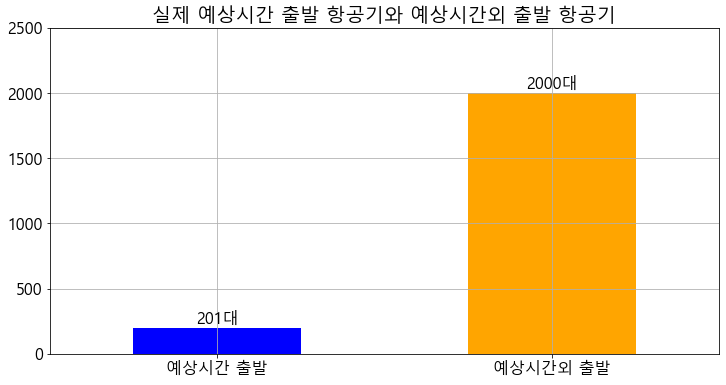

In [39]:
NON_EXPECT = len(df.query('DEP_TIME != CRS_DEP_TIME'))
EXPECT = len(df.query('DEP_TIME == CRS_DEP_TIME'))

new_Series = Series([EXPECT, NON_EXPECT])

new_Series.plot.bar(rot = 0, color = ['blue', 'orange'])
plt.grid()
plt.title('실제 예상시간 출발 항공기와 예상시간외 출발 항공기')
plt.xticks([0,1], ['예상시간 출발', '예상시간외 출발'])
plt.ylim(0, 2500)

for i,v in enumerate(new_Series):
    txt = '%s대' %v
    plt.text(i, v, txt, horizontalalignment = 'center', verticalalignment = 'bottom')
plt.show()

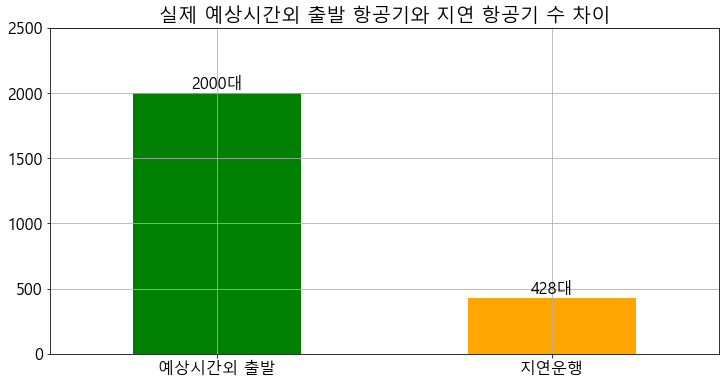

In [40]:
NON_EXPECT = len(df.query('DEP_TIME != CRS_DEP_TIME'))
delay = df['FLIGHT_STATUS'].value_counts()[1]

new_Series = Series([NON_EXPECT, delay])

new_Series.plot.bar(rot = 0, color = ['green', 'orange'])
plt.grid()
plt.title('실제 예상시간외 출발 항공기와 지연 항공기 수 차이')
plt.xticks([0,1], ['예상시간외 출발', '지연운행'])
plt.ylim(0, 2500)

for i,v in enumerate(new_Series):
    txt = '%s대' %v
    plt.text(i, v, txt, horizontalalignment = 'center', verticalalignment = 'bottom')
plt.show()

[Text(0, 0, 'EWR'), Text(1, 0, 'JFK'), Text(2, 0, 'LGA')]

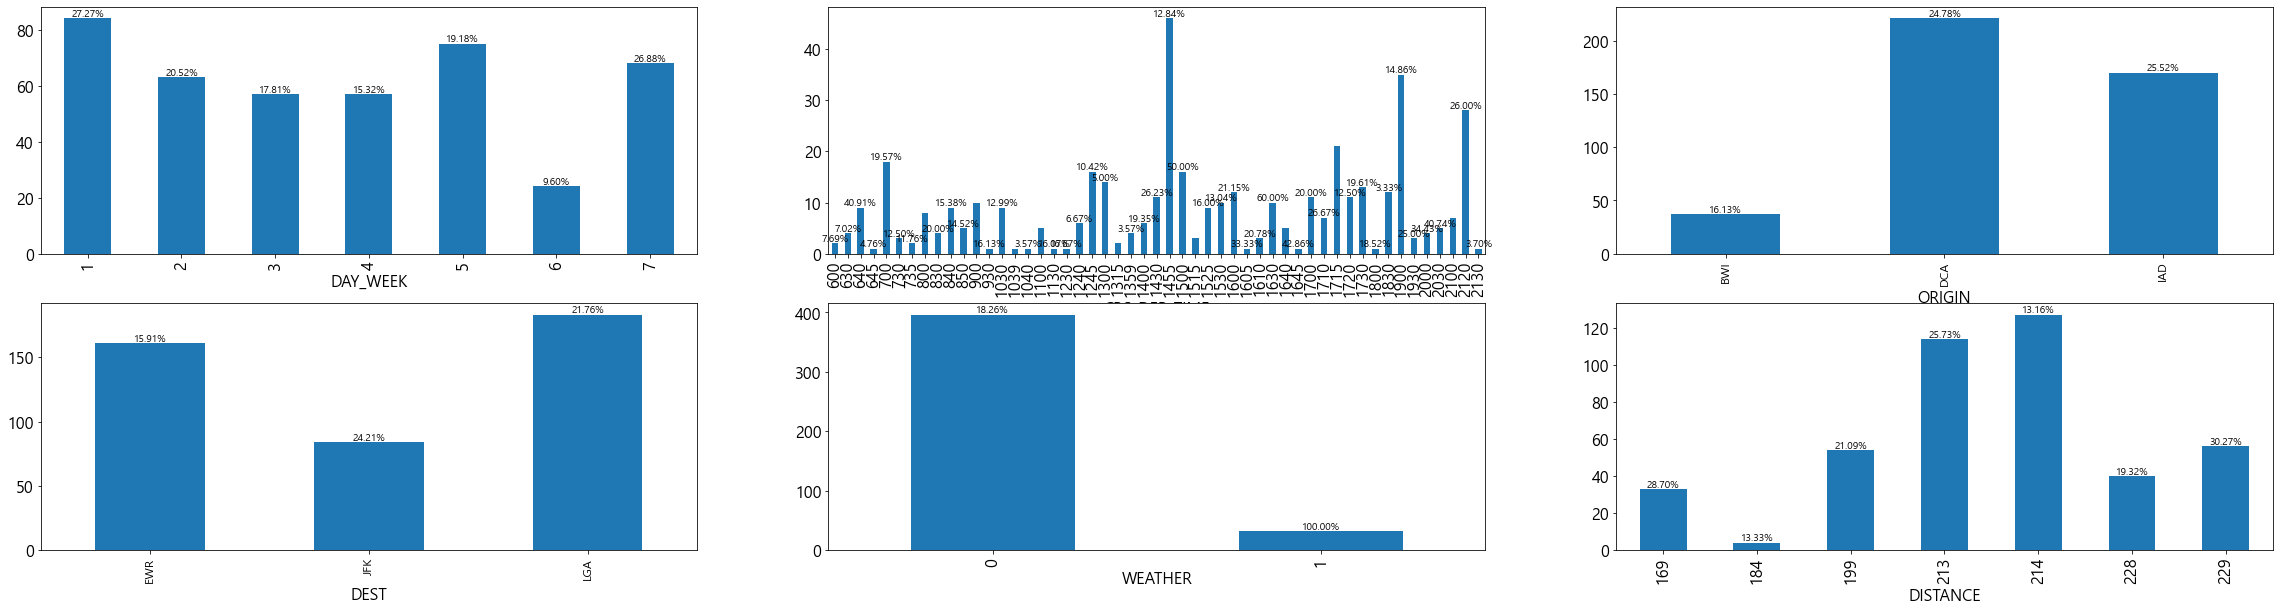

In [62]:
key_list = ['DAY_WEEK', 'CRS_DEP_TIME', 'ORIGIN', 'DEST', 'WEATHER', 'DISTANCE']
Delay_Flight = df.query('FLIGHT_STATUS == 1')
Non_Flight = df.query('FLIGHT_STATUS == 0')

fig, ax = plt.subplots(2,3, figsize = (40,10))

ax = ax.ravel()

for i,v in enumerate(key_list):
    data = Delay_Flight[v].value_counts().sort_index()
    a = np.zeros(7)
    print(a)
    for j in range(0, len(Delay_Flight[v])):
        a[j-1] = a[j-1] + 1
    a = Series(a)
    
    Delay_rate = list(Delay_Flight[v].value_counts()/(Non_Flight[v].value_counts() + Delay_Flight[v].value_counts()) * 100)
    print(Delay_Flight[v].value_counts())
    print('----')
    print(len(Delay_Flight[v]))
    data.plot.bar(ax = ax[i], rot = 90)
    ax[i].set_xlabel(v)
    for j, item in enumerate(data):
        if pd.isna(Delay_rate[j]):
            continue
        txt = '%0.2f%%' %Delay_rate[j]
        ax[i].text(j, item, txt, fontsize=10, color='#000000', horizontalalignment='center', verticalalignment='bottom')

ax[2].set_xticklabels(['BWI','DCA','IAD'], fontsize = 12)
ax[3].set_xticklabels(['EWR','JFK','LGA'], fontsize = 12)

- 요일별 빈도 그래프에서는 월요일에 가장 많은 연착을 보이고, 토요일에 가장 적은 연착을 보인다. 요일별 항공편과 관련이 있어보인다.
- 14:55분에 연착된 비행기가 가장 많았다. 이는 해당 시간대에 총 운행하는 비행기수와 연관이 있어보인다.
- DCA공항의 빈도수가 가장 높고, BWI공항의 빈도수가 가장낮다.
- LGA공항의 빈도수가 가장 높고, JFK공항의 빈도수가 가장낮다.
- 기상이 정상일때의 지연빈도가 높게 보이지만, 기상이 정상일때와 악천후일때 표본수의 차이가 중요해 보인다.(기상이 정상일때가 많음)
- 비행거리가 213,214일때 연착의 빈도수가 높다. 해당 항공편의 대수에 의한 것으로 보인다.

[Text(0, 0, 'EWR'), Text(1, 0, 'JFK'), Text(2, 0, 'LGA')]

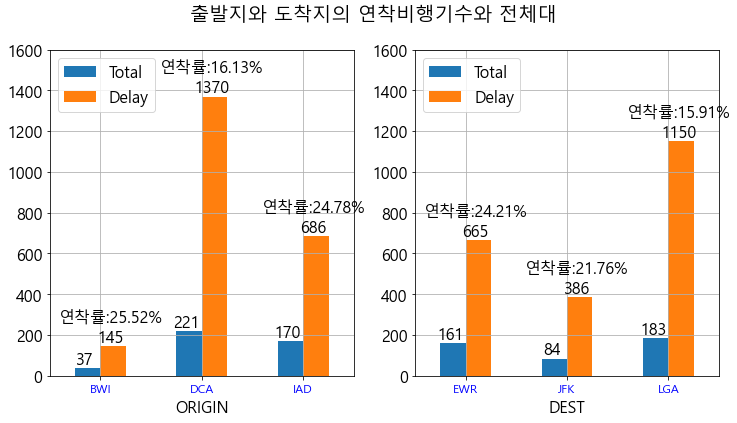

In [11]:
fig ,ax = plt.subplots(1,2)
key_list = ['ORIGIN', 'DEST']

plt.suptitle('출발지와 도착지의 연착비행기수와 전체대')
for i,v in enumerate(key_list):
    tmp = pd.crosstab(df[v], df['FLIGHT_STATUS'])
    tmp[0] = tmp[1] + tmp[0]
    tmp.plot.bar(ax = ax[i], rot = 0)
    ax[i].legend(['Total', 'Delay'], loc = 2)
    ax[i].set_ylim(0,1600)
    ax[i].grid()
    
    for j,val_list in enumerate(tmp.values):
        txt = '%s' %val_list[0]
        ax[i].text(j-0.15,val_list[0],txt, horizontalalignment = 'center', verticalalignment = 'bottom')
        
        txt = '%s' %val_list[1]
        ax[i].text(j+0.1,val_list[1],txt, horizontalalignment = 'center', verticalalignment = 'bottom')
        
        txt = '연착률:%0.2f%%' %((val_list[0]/val_list[1]) * 100)
        ax[i].text(j+0.1,val_list[1]+ 100 ,txt, horizontalalignment = 'center', verticalalignment = 'bottom')
ax[0].set_xticklabels(['BWI','DCA','IAD'], fontsize = 12, color='#0000ff')
ax[1].set_xticklabels(['EWR','JFK','LGA'], fontsize = 12, color='#0000ff')


### 연착율 = (연착된 비행기대수 / 전체 비행기 대수)로 정의하면,<br>출발지는 BWI 공항이 25.25%으로 가장 높았고, <br>도착지는 EWR 공항이 24.21%로 가장 높았다. 

### 항공사별 연착율의 차이가 출발지는 최대 10%, 도착지는 최대 8% 가량 차이가 

In [12]:

df['FLIGHT_STATUS']  = df['FLIGHT_STATUS'].astype('int64')
model = logit('FLIGHT_STATUS ~ DAY_WEEK + CRS_DEP_TIME + WEATHER + DISTANCE', data=df)
fit = model.fit()
print(fit.summary())

print('공항의 규모에 따라 연착되는 비행기의 수차이가 생기는 ORIGIN과 DEST는 해당 공항이기 때문에 연착이 발생한다고 보기 어렵다고 판단하여 변수에서 제외')
print('특정 요일에 연착되는 비행기 수가 줄어드는 것으로 보아 해당 요일에 운행되는 항공편과 관련이 있을것으로 보이고, 연착과 관련이 있어보임')
print('특정 시간대에 출발하는 비행기가 연착이 많이 되는것으로 보아 그 시간대와 연착이 관련이 있어보임')
print('날씨가 정상일때와 악천후일떄의 빈도수 차이가 확연하기 때문에 변수로 설정 가능해보임')
print('특정 비행거리를 비행하는 비행기와 연착이 관련이 있어보임')

         Current function value: 0.453487
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:          FLIGHT_STATUS   No. Observations:                 2201
Model:                          Logit   Df Residuals:                     2191
Method:                           MLE   Df Model:                            9
Date:                Thu, 24 Jun 2021   Pseudo R-squ.:                 0.07944
Time:                        12:04:25   Log-Likelihood:                -998.12
converged:                      False   LL-Null:                       -1084.3
Covariance Type:            nonrobust   LLR p-value:                 2.076e-32
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.5883      0.891     -0.660      0.509      -2.335       1.158
DAY_WEEK[T.2]    -0.4524      0.211     -2.146      0.03

c:\users\junhong\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### 결과해석

- 유의확률을 봤을 때 CRS_DEP_TIME(출발예정시각)을 제외한 변수들이 0.05 이상이다 (요일의 경우 T.7 일때 0.05 이상)
- 해당 변수들을 제외하고 다시 분석을 수행해야 한다.

In [13]:
model = logit('FLIGHT_STATUS ~ CRS_DEP_TIME', data=df)
fit = model.fit()
print(fit.summary())

Optimization terminated successfully.
         Current function value: 0.486200
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          FLIGHT_STATUS   No. Observations:                 2201
Model:                          Logit   Df Residuals:                     2199
Method:                           MLE   Df Model:                            1
Date:                Thu, 24 Jun 2021   Pseudo R-squ.:                 0.01303
Time:                        12:04:25   Log-Likelihood:                -1070.1
converged:                       True   LL-Null:                       -1084.3
Covariance Type:            nonrobust   LLR p-value:                 1.057e-07
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -2.3723      0.194    -12.223      0.000      -2.753      -1.992
CRS_DEP_TIME     0.0007

### 결과해석

- 유의확률이 0.05 이하로 유의한 변수이다.
- CRS_DEP_TIME의 회귀계수가 양수이므로 높을수록 확률이 높아진다.

In [14]:
# 오즈비 확인
print(np.exp(fit.params))

print('오즈비가 1에 근접해 지연여부에 크게 영향을 주지 않는다.')

Intercept       0.093265
CRS_DEP_TIME    1.000675
dtype: float64
오즈비가 1에 근접해 지연여부에 크게 영향을 주지 않는다.


In [15]:
# 혼동 행렬
conf_tab = fit.pred_table()
conf_tab

array([[1773.,    0.],
       [ 428.,    0.]])

In [16]:
conf_df = DataFrame(conf_tab, 
                    index=['True','False'], 
                    columns=['Positive', 'Negative'])
conf_df

,Positive,Negative
True,1773.0,0.0
False,428.0,0.0


In [17]:
# 분류정확도

k = (conf_df['Positive']['True']+conf_df['Negative']['False']) / len(df)
print('분류 정확도 :', k)

분류 정확도 : 0.805542935029532


### 로지스틱 회귀분석 결과 0.80수준의 분류 정확도를 보였다.

## 2

In [18]:
df = read_excel('http://itpaper.co.kr/data/diabetes.xlsx', engine = 'openpyxl')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [20]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

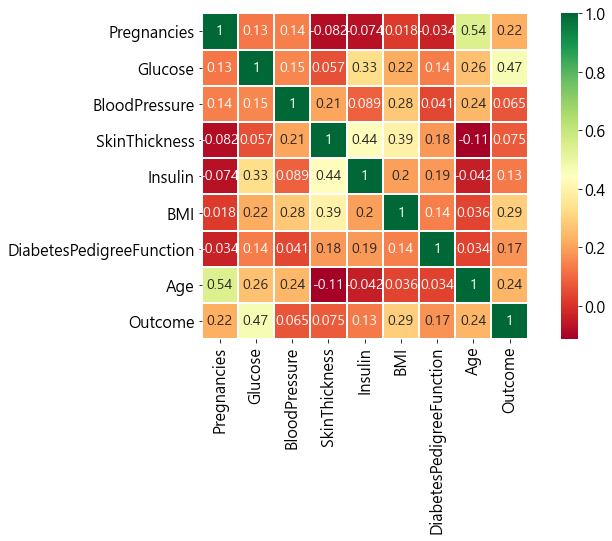

In [21]:
corr = df.corr()

ax = sns.heatmap(corr,
                square = True,
                cmap='RdYlGn',
                linewidth = 0.1,
                linecolor = 'white',
                annot = True,
                annot_kws={'size' : 14})

#### 'Glucose', 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction', 'Insulin', 'SkinThickness', 'BloodPressure' <br> 순으로 상관계수가 크다

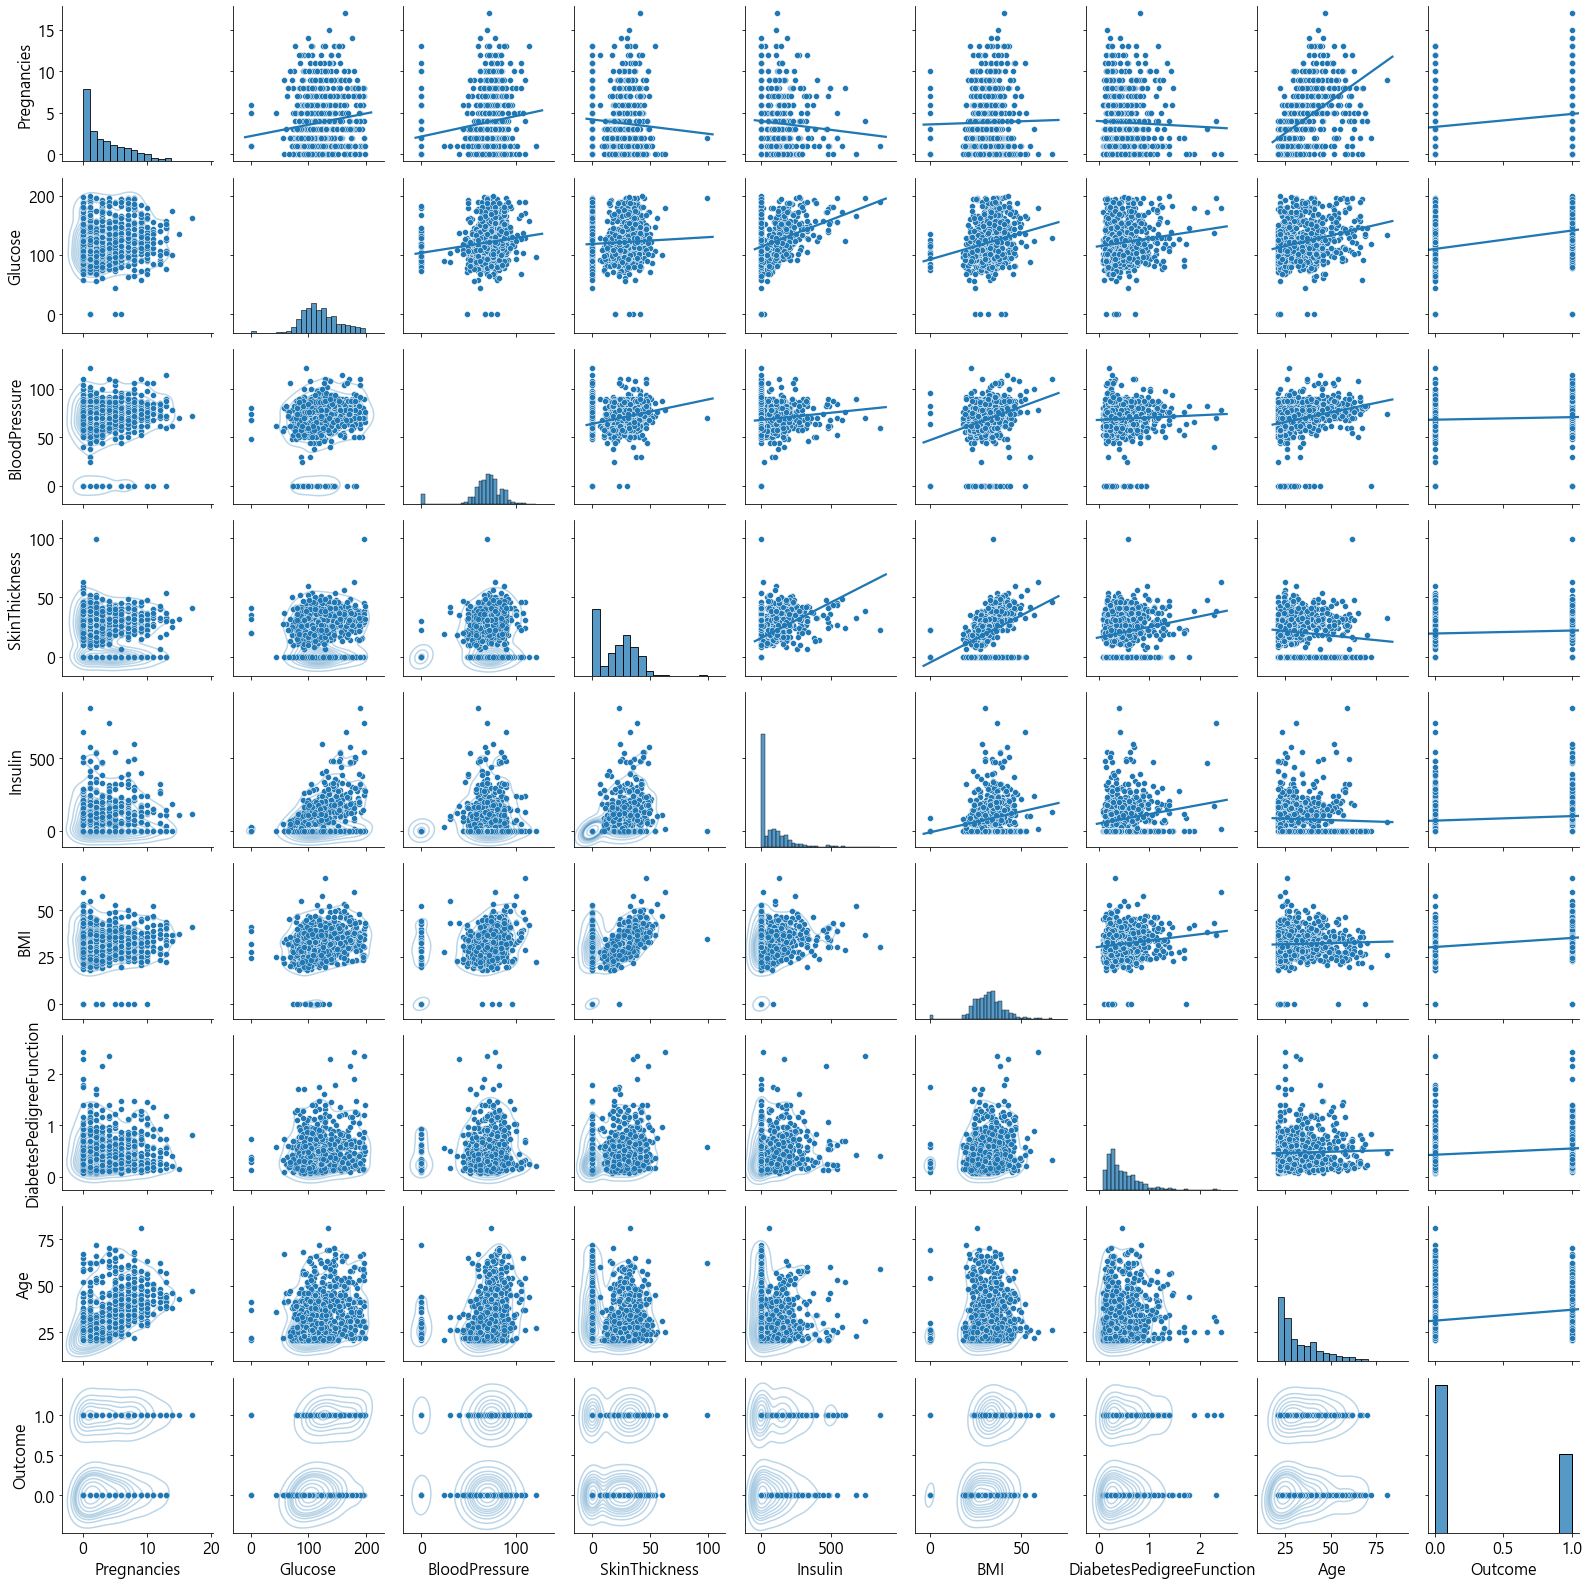

In [22]:
g = sns.pairplot(df)
g.map_upper(sns.regplot, scatter=False, truncate=False, ci=False)
g.map_lower(sns.kdeplot, alpha=0.3)
plt.show()

In [23]:
factor = df[['Glucose', 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction', 'Insulin', 'SkinThickness', 'BloodPressure']]
factor

,Glucose,BMI,Age,Pregnancies,DiabetesPedigreeFunction,Insulin,SkinThickness,BloodPressure
0,148,33.6,50,6,0.627,0,35,72
1,85,26.6,31,1,0.351,0,29,66
2,183,23.3,32,8,0.672,0,0,64
3,89,28.1,21,1,0.167,94,23,66
4,137,43.1,33,0,2.288,168,35,40
...,...,...,...,...,...,...,...,...
763,101,32.9,63,10,0.171,180,48,76
764,122,36.8,27,2,0.340,0,27,70
765,121,26.2,30,5,0.245,112,23,72
766,126,30.1,47,1,0.349,0,0,60


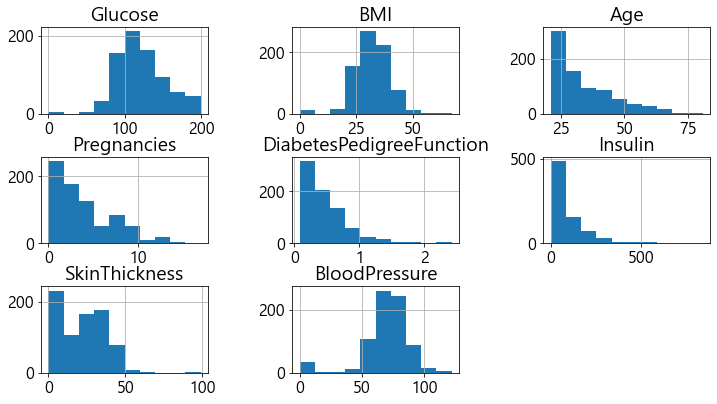

In [24]:
ax = factor.hist()
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.5)


In [25]:
model = logit('Outcome ~ Glucose + BMI + Age + Pregnancies', data=df)
fit = model.fit()
print(fit.summary())

print('상대적으로 상관계수가 높은 Glucose, BMI, Age, Pregnancies를 변수로 선정하였다.')

Optimization terminated successfully.
         Current function value: 0.483138
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      763
Method:                           MLE   Df Model:                            4
Date:                Thu, 24 Jun 2021   Pseudo R-squ.:                  0.2530
Time:                        12:05:03   Log-Likelihood:                -371.05
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 3.276e-53
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -8.3974      0.673    -12.486      0.000      -9.716      -7.079
Glucose         0.0332    

- 유의확률이 0.05이상인 Age 변수를 제거하고 다시 분석

In [26]:
model = logit('Outcome ~ Glucose + BMI + Pregnancies', data=df)
fit = model.fit()
print(fit.summary())

Optimization terminated successfully.
         Current function value: 0.484456
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      764
Method:                           MLE   Df Model:                            3
Date:                Thu, 24 Jun 2021   Pseudo R-squ.:                  0.2510
Time:                        12:05:03   Log-Likelihood:                -372.06
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 9.005e-54
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -8.1240      0.638    -12.724      0.000      -9.375      -6.873
Glucose         0.0342    

### 결과해석

- 모든계수의 pvalue가 0.05 이하이므로 종속변수에 영향을 주는 유의한 변수이다.
- 모든 회귀계수는 양수이므로 각 요인의 값이 높아질수록 당뇨에 걸릴 확률이 늘어난다.

In [27]:
# 오즈비 확인
np.exp(fit.params)

Intercept      0.000296
Glucose        1.034753
BMI            1.084968
Pregnancies    1.146936
dtype: float64

- Glucose, BMI는 당뇨여부에 크게 영향을 주지 않는다.
- 임신횟수가 많을수록 당뇨에 걸릴 확률이 늘어난다.

In [28]:
# 분류 정확도 파악
conf_tab = fit.pred_table()
conf_tab

array([[437.,  63.],
       [116., 152.]])

In [29]:
conf_df = DataFrame(conf_tab, 
                    index=['True','False'], 
                    columns=['Positive', 'Negative'])
conf_df

,Positive,Negative
True,437.0,63.0
False,116.0,152.0


In [30]:
k = (conf_df['Positive']['True']+conf_df['Negative']['False']) / len(df)
print('분류 정확도 :', k)

분류 정확도 : 0.7669270833333334


### 회귀모델의 분류정확도는 0.767의 정확도를 보인다.